In [1]:
import os
os.chdir("D:\IIT Kanpur\Time Series Project")
os.getcwd()

'D:\\IIT Kanpur\\Time Series Project'

In [2]:
import pandas as pd
nifty_df = pd.read_excel("Nf50_Data5.xlsx")
nifty_df.head()
isinstance(nifty_df, pd.DataFrame)

True

In [3]:
yt_obs = nifty_df["Close"]
yt_obs

0      11582.35
1      11520.30
2      11476.95
3      11536.90
4      11589.10
         ...   
136    11354.25
137    11483.25
138    11445.05
139    11570.00
140    11623.90
Name: Close, Length: 141, dtype: float64

In [4]:
len(yt_obs)
import numpy as np
x = np.arange(len(yt_obs)) + 1
x
nifty_df['x'] = x
nifty_df.head()
nifty_df.drop(nifty_df.columns[[1,2,3]],axis = 1, inplace=True)
nifty_df.head()

,Time,Close,x
0,2018-09-03,11582.35,1
1,2018-09-04,11520.30,2
2,2018-09-05,11476.95,3
3,2018-09-06,11536.90,4
4,2018-09-07,11589.10,5


In [5]:
nifty_time = nifty_df.set_index("Time")
nifty_time

,Close,x
Time,,
2018-09-03,11582.35,1
2018-09-04,11520.30,2
2018-09-05,11476.95,3
2018-09-06,11536.90,4
2018-09-07,11589.10,5
...,...,...
2019-03-25,11354.25,137
2019-03-26,11483.25,138
2019-03-27,11445.05,139


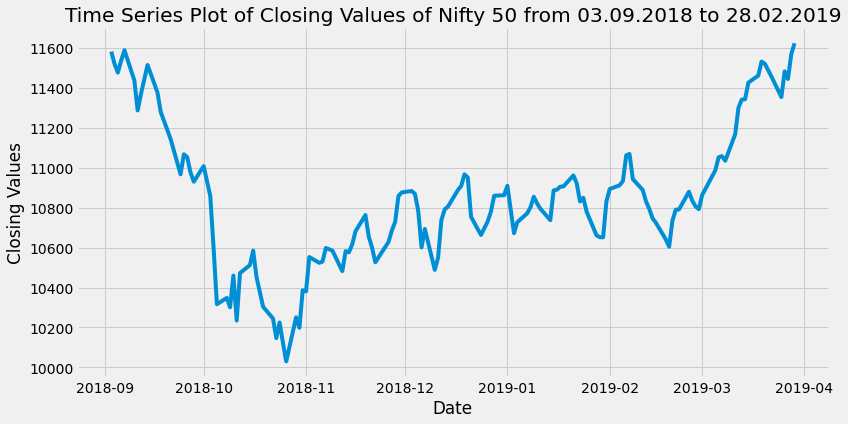

In [8]:
import matplotlib.pyplot as plt
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 6))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Closing Values")
plt.title("Time Series Plot of Closing Values of Nifty 50 from 03.09.2018 to 28.02.2019")
 

plt.plot(nifty_time["Close"])

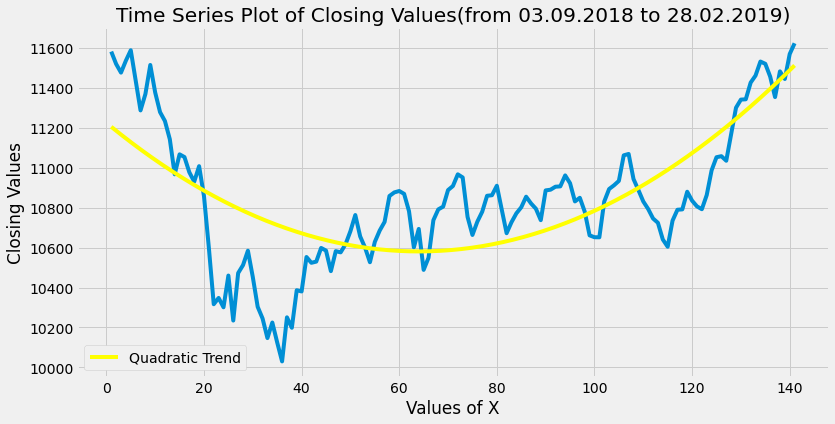

In [11]:
import numpy as np
import matplotlib.pyplot as plt

lin_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 1))
quad_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 2))
myline = np.linspace(1, 141, 200)



# setting figure size to 12, 10
plt.figure(figsize=(12, 6))
 
# Labelling the axes and setting
# a title
plt.xlabel("Values of X")
plt.ylabel("Closing Values")
plt.title("Time Series Plot of Closing Values(from 03.09.2018 to 28.02.2019)")

plt.plot(nifty_df['x'],nifty_df['Close'])

#plt.plot(myline, lin_trend(myline), color = 'red', label = 'Linear Trend')

plt.plot(myline, quad_trend(myline), color = 'yellow', label = 'Quadratic Trend')

plt.legend(framealpha=1, frameon=True)

plt.show()

#quad_trend(5)

In [12]:
import pandas as pd 
#np.polyfit(nifty_df["x"],nifty_df["High Points"],2)
T_t = quad_trend(x)
detrended_value = yt_obs/T_t
detrended_value

list_of_tuple = list(zip(nifty_df['Time'],x,yt_obs, T_t,detrended_value))
df1 = pd.DataFrame(list_of_tuple, columns=["Time","x","yt_obs", "T_t","detrended_value"])
df1.head()

,Time,x,yt_obs,T_t,detrended_value
0,2018-09-03,1,11582.35,11205.465284,1.033634
1,2018-09-04,2,11520.30,11185.803984,1.029904
2,2018-09-05,3,11476.95,11166.457176,1.027806
3,2018-09-06,4,11536.90,11147.424859,1.034939
4,2018-09-07,5,11589.10,11128.707034,1.041370


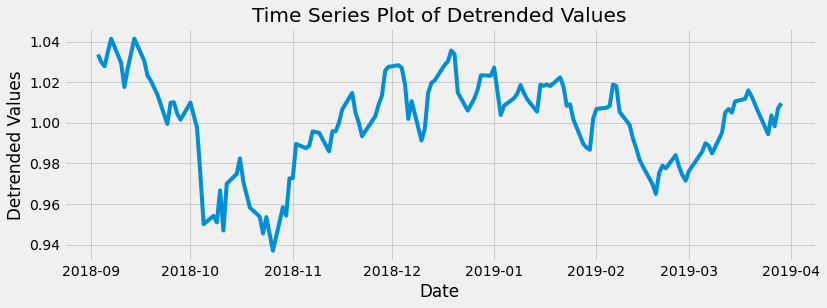

In [13]:
df1_time_index = df1.set_index("Time")
df1_time_index.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Detrended Values")
plt.title("Time Series Plot of Detrended Values")
 

plt.plot(df1_time_index["detrended_value"])

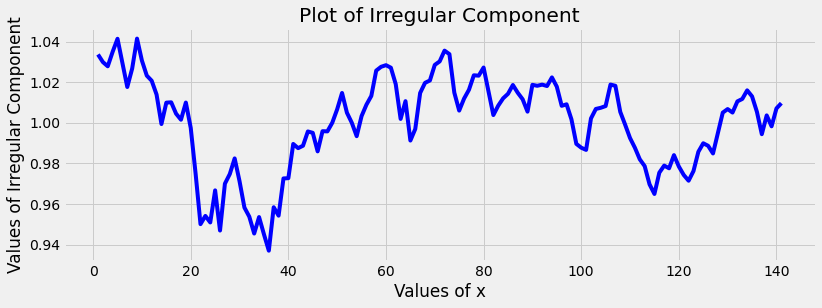

In [14]:
irregular = detrended_value
irregular
df1["irregular"] = irregular
df1.head()
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(x, irregular, c = "blue")

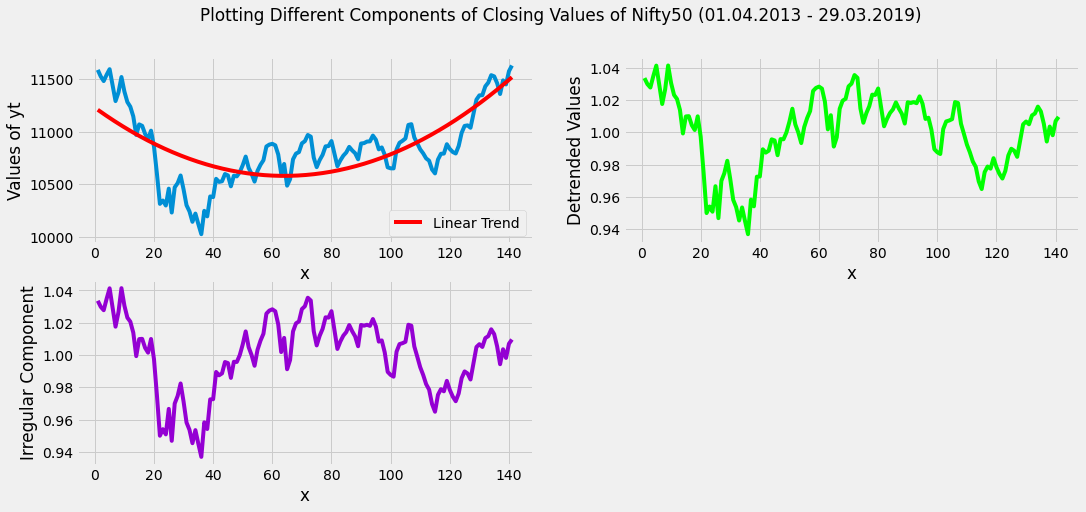

In [15]:
plt.figure(figsize=(16, 7))
plt.subplot(221)
plt.xlabel("x")
plt.ylabel("Values of yt")
#plt.title("Time Series Plot")
plt.plot(x, nifty_time["Close"])
plt.plot(myline, quad_trend(myline), color = 'red', label = 'Linear Trend')
plt.legend(framealpha=1, frameon=True)



plt.subplot(222)
plt.xlabel("x")
plt.ylabel("Detrended Values")
#plt.title("Time Series Plot of Detrended Values")
plt.plot(x, df1_time_index["detrended_value"], c = "lime")




plt.subplot(223)
plt.xlabel("x")
plt.ylabel("Irregular Component")
#plt.title("Plot of Irregular Component")
plt.plot(x, irregular, c = "darkviolet")



plt.suptitle("Plotting Different Components of Closing Values of Nifty50 (01.04.2013 - 29.03.2019)")
plt.show()


In [12]:
df1.head()

,Time,x,yt_obs,T_t,detrended_value,irregular
0,2018-09-03,1,11582.35,11205.465284,1.033634,1.033634
1,2018-09-04,2,11520.30,11185.803984,1.029904,1.029904
2,2018-09-05,3,11476.95,11166.457176,1.027806,1.027806
3,2018-09-06,4,11536.90,11147.424859,1.034939,1.034939
4,2018-09-07,5,11589.10,11128.707034,1.041370,1.041370


In [16]:
train_data = df1[:122]
display(train_data)

test_data = df1[122:]
display(test_data)

,Time,x,yt_obs,T_t,detrended_value,irregular
0,2018-09-03,1,11582.35,11205.465284,1.033634,1.033634
1,2018-09-04,2,11520.30,11185.803984,1.029904,1.029904
2,2018-09-05,3,11476.95,11166.457176,1.027806,1.027806
3,2018-09-06,4,11536.90,11147.424859,1.034939,1.034939
4,2018-09-07,5,11589.10,11128.707034,1.041370,1.041370
...,...,...,...,...,...,...
117,2019-02-22,118,10791.65,11039.234254,0.977572,0.977572
118,2019-02-25,119,10880.10,11056.368490,0.984057,0.984057
119,2019-02-26,120,10835.30,11073.817217,0.978461,0.978461
120,2019-02-27,121,10806.65,11091.580436,0.974311,0.974311


,Time,x,yt_obs,T_t,detrended_value,irregular
122,2019-03-01,123,10863.50,11128.050350,0.976227,0.976227
123,2019-03-05,124,10987.45,11146.757044,0.985708,0.985708
124,2019-03-06,125,11053.00,11165.778231,0.989900,0.989900
125,2019-03-07,126,11058.20,11185.113909,0.988653,0.988653
126,2019-03-08,127,11035.40,11204.764078,0.984885,0.984885
127,2019-03-11,128,11168.05,11224.728740,0.994951,0.994951
128,2019-03-12,129,11301.20,11245.007893,1.004997,1.004997
129,2019-03-13,130,11341.70,11265.601538,1.006755,1.006755
130,2019-03-14,131,11343.25,11286.509675,1.005027,1.005027
131,2019-03-15,132,11426.85,11307.732303,1.010534,1.010534


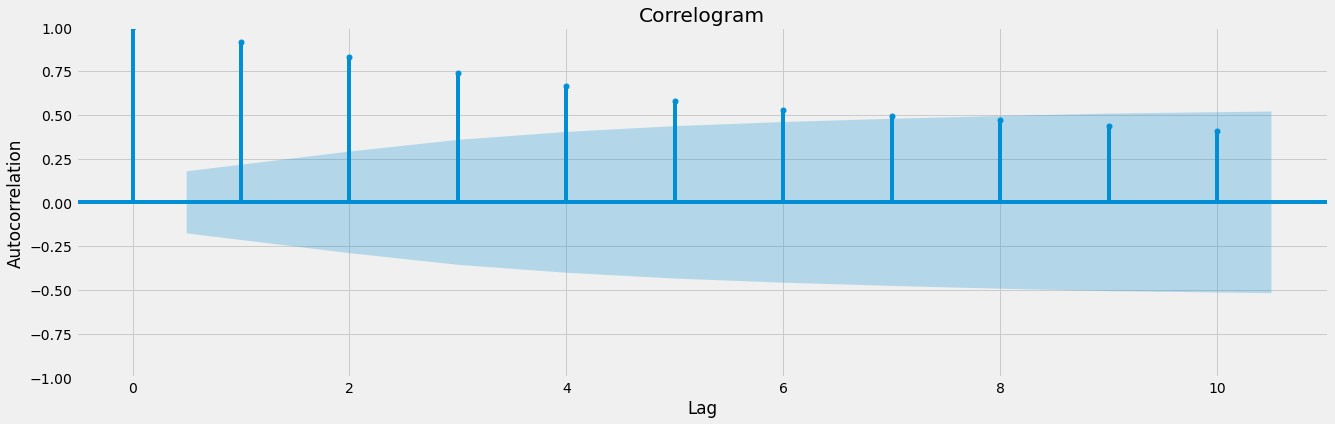

In [17]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(20, 6))
plot_acf(train_data["irregular"], lags=10, ax=ax)

# Set plot labels and title
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Correlogram')

# Show the plot
plt.show()

In [32]:
#df1.to_csv('output.csv', index= True)

In [18]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=10, trend='n')
result = model.fit()
#print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
#print(forecast_ar)

In [21]:
len(AR1_values)


117

In [23]:
len(AR1_values)
AR1_values
Ar_ax = np.floor(np.linspace(6,122,117))
len(Ar_ax)

117

,Time,x,yt_obs,T_t,detrended_value,irregular
0,2018-09-03,1,11582.35,11205.465284,1.033634,1.033634
1,2018-09-04,2,11520.30,11185.803984,1.029904,1.029904
2,2018-09-05,3,11476.95,11166.457176,1.027806,1.027806
3,2018-09-06,4,11536.90,11147.424859,1.034939,1.034939
4,2018-09-07,5,11589.10,11128.707034,1.041370,1.041370
...,...,...,...,...,...,...
117,2019-02-22,118,10791.65,11039.234254,0.977572,0.977572
118,2019-02-25,119,10880.10,11056.368490,0.984057,0.984057
119,2019-02-26,120,10835.30,11073.817217,0.978461,0.978461
120,2019-02-27,121,10806.65,11091.580436,0.974311,0.974311


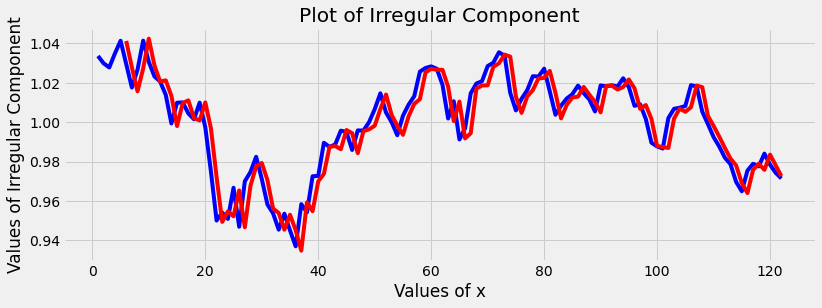

In [24]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(train_data["x"], train_data["irregular"], c = "blue")
plt.plot(Ar_ax, AR1_values, c = "red")
display(train_data)

In [104]:
#from statsmodels.tsa.api import SimpleExpSmoothing
#from sklearn.metrics import mean_squared_error

#smoothing_levels = np.linspace(0.1,0.9,100)
#sse_array = []

#best_alpha = None
#best_mse = float('inf')

# Calculate SSE for different smoothing levels
#for level in smoothing_levels:
 #   model = SimpleExpSmoothing(irregular)
 #   fitted_model = model.fit(smoothing_level=level)
 #   fitted_values = fitted_model.fittedvalues
   
 #   sse = ((fitted_values - irregular) ** 2).sum()
 #   sse_array.append(sse)
 #   mse = mean_squared_error(irregular, fitted_values)
 #   if mse < best_mse:
 #       best_alpha = level
 #       best_mse = mse
   
    #print("Smoothing Level:", level)
    #print("Error Sum of Squares (SSE):", sse)
    #print()
#best_alpha

In [19]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

smoothing_levels = np.linspace(0.1,0.4,100)
sse_array = []

best_alpha = None
best_mse = float('inf')

# Calculate SSE for different smoothing levels
for level in smoothing_levels:
    model = SimpleExpSmoothing(train_data["irregular"])
    fitted_model = model.fit(smoothing_level=level)
    
    predictions = fitted_model.forecast(1)
    mse = (test_data["irregular"].iloc[0] - predictions)**2
    
    if mse.iloc[0] < best_mse:
        best_alpha = level
        best_mse = mse.iloc[0]
   
    #print("Smoothing Level:", level)
    #print("Error Sum of Squares (SSE):", sse)
    #print()
best_alpha

0.27272727272727276

In [20]:
from statsmodels.tsa.api import SimpleExpSmoothing

final_model_simp_exp = SimpleExpSmoothing(train_data["irregular"])
fitted_model_simp_exp = final_model_simp_exp.fit(smoothing_level = best_alpha)  # Adjust smoothing level as desired

# Obtain the fitted values and forecast for the next period
fitted_values_simp_exp = fitted_model_simp_exp.fittedvalues

# Print the fitted values and forecast
#print("Fitted Values:")
#print(fitted_values)

#sse = ((fitted_values - irregular) ** 2).sum()
#print("SSE:")
#print(sse)
print(fitted_model_simp_exp.summary())
fitted_values_simp_exp

                       SimpleExpSmoothing Model Results                       
Dep. Variable:              irregular   No. Observations:                  122
Model:             SimpleExpSmoothing   SSE                              0.020
Optimized:                       True   AIC                          -1059.762
Trend:                           None   BIC                          -1054.154
Seasonal:                        None   AICC                         -1059.420
Seasonal Periods:                None   Date:                 Mon, 17 Jul 2023
Box-Cox:                        False   Time:                         15:35:45
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2727273                alpha                False
initial_level              1.0309447                

0      1.030945
1      1.031678
2      1.031194
3      1.030270
4      1.031543
         ...   
117    0.978295
118    0.978098
119    0.979723
120    0.979379
121    0.977997
Length: 122, dtype: float64

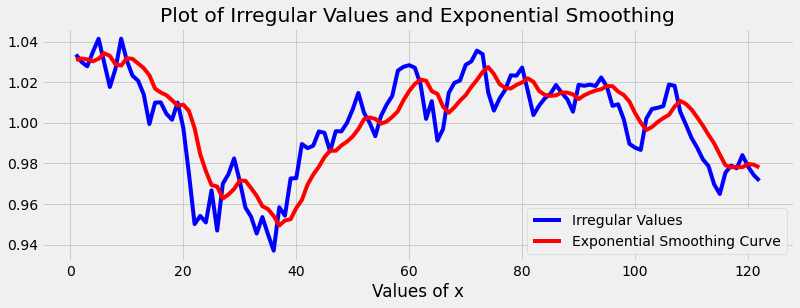

In [22]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
#plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Values and Exponential Smoothing")

plt.plot(train_data["x"], train_data["irregular"], c = "blue", label = "Irregular Values")
plt.plot(train_data["x"], fitted_values_simp_exp, c = "red", label = "Exponential Smoothing Curve")
plt.legend(framealpha=1, frameon=True)

In [23]:
test_predictions = fitted_model_simp_exp.forecast(19)
#mse = mean_squared_error(test_data['irregular'], test_predictions)
#print(mse)
#print(test_predictions)
#fitted_model_simp_exp.fittedvalues.forecast(10)
test_predictions
forecast_simexp = test_predictions

In [24]:
display(train_data)
display(test_data)

,Time,x,yt_obs,T_t,detrended_value,irregular
0,2018-09-03,1,11582.35,11205.465284,1.033634,1.033634
1,2018-09-04,2,11520.30,11185.803984,1.029904,1.029904
2,2018-09-05,3,11476.95,11166.457176,1.027806,1.027806
3,2018-09-06,4,11536.90,11147.424859,1.034939,1.034939
4,2018-09-07,5,11589.10,11128.707034,1.041370,1.041370
...,...,...,...,...,...,...
117,2019-02-22,118,10791.65,11039.234254,0.977572,0.977572
118,2019-02-25,119,10880.10,11056.368490,0.984057,0.984057
119,2019-02-26,120,10835.30,11073.817217,0.978461,0.978461
120,2019-02-27,121,10806.65,11091.580436,0.974311,0.974311


,Time,x,yt_obs,T_t,detrended_value,irregular
122,2019-03-01,123,10863.50,11128.050350,0.976227,0.976227
123,2019-03-05,124,10987.45,11146.757044,0.985708,0.985708
124,2019-03-06,125,11053.00,11165.778231,0.989900,0.989900
125,2019-03-07,126,11058.20,11185.113909,0.988653,0.988653
126,2019-03-08,127,11035.40,11204.764078,0.984885,0.984885
127,2019-03-11,128,11168.05,11224.728740,0.994951,0.994951
128,2019-03-12,129,11301.20,11245.007893,1.004997,1.004997
129,2019-03-13,130,11341.70,11265.601538,1.006755,1.006755
130,2019-03-14,131,11343.25,11286.509675,1.005027,1.005027
131,2019-03-15,132,11426.85,11307.732303,1.010534,1.010534


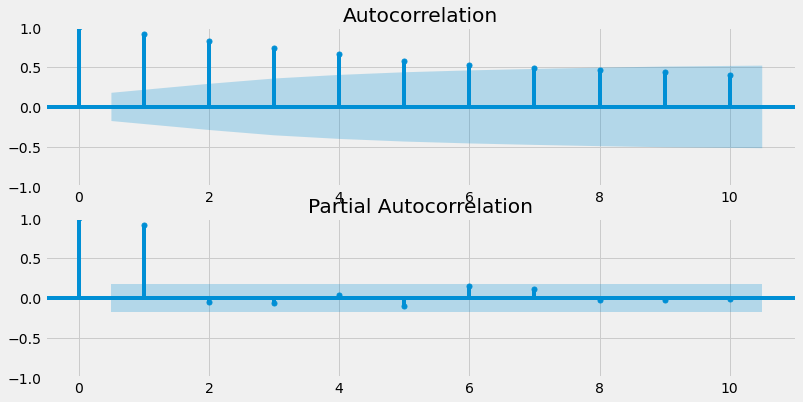

In [32]:
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
sm.graphics.tsa.plot_acf(train_data["irregular"], ax=ax1, lags=10)
sm.graphics.tsa.plot_pacf(train_data["irregular"], ax=ax2, lags=10,  method='ywm')
plt.show()

In [33]:
plt.figure(figsize=(12, 4))

import statsmodels.api as sm
model_arima = sm.tsa.ARIMA(train_data["irregular"], order=(5, 0, 1))  # ARIMA(p, d, q) where d=0 for ARMA model
results_arima = model_arima.fit(method_kwargs={'maxiter': 4000})
fitted_values_arima = results_arima.fittedvalues
#print(fitted_values_arima)

est_residual_train = fitted_values_arima

est_yt_train = train_data["T_t"]*est_residual_train
#print(est_residual_train)
#print(est_yt_train)

<Figure size 864x288 with 0 Axes>

In [34]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=10, trend='n')
result = model.fit()
#print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
#print(forecast_ar)

In [35]:
forecast_start = len(train_data["irregular"])
forecast_end = forecast_start + 18  # Adjust the forecast horizon as needed
forecast = results_arima.predict(start=forecast_start, end=forecast_end)
#print(forecast)

est_residual_test = forecast
est_yt_test = test_data["T_t"]*est_residual_test
est_yt_test_ar = test_data["T_t"]*forecast_ar
est_yt_test_simexp = test_data["T_t"]*forecast_simexp

2      1.027806
3      1.034939
4      1.041370
5      1.029504
6      1.017606
         ...   
117    0.977572
118    0.984057
119    0.978461
120    0.974311
121    0.971452
Name: irregular, Length: 120, dtype: float64


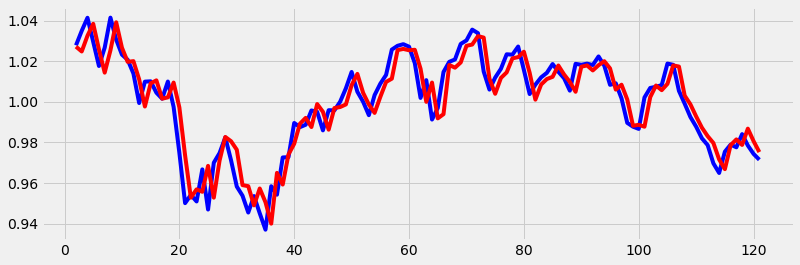

In [36]:
plt.figure(figsize=(12, 4))
plt.plot((train_data["irregular"])[2:], color = "blue")
plt.plot(fitted_values_arima[2:], color = "red")

#plt.plot(fitted_values_arima, color = "red")
print((train_data["irregular"])[2:])

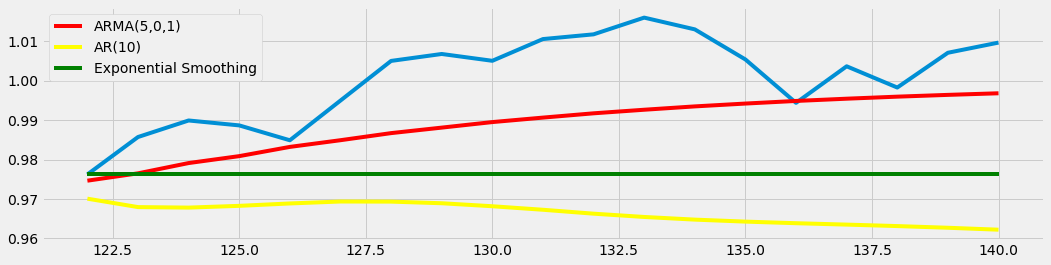

In [37]:
plt.figure(figsize=(16, 4))
plt.plot(test_data["irregular"])
plt.plot(forecast, color = "red", label = "ARMA(5,0,1)")
plt.plot(forecast_ar, color = "yellow", label = "AR(10)")
plt.plot(forecast_simexp, color = "green", label = "Exponential Smoothing")
plt.legend(framealpha=1, frameon=True)

plt.show()

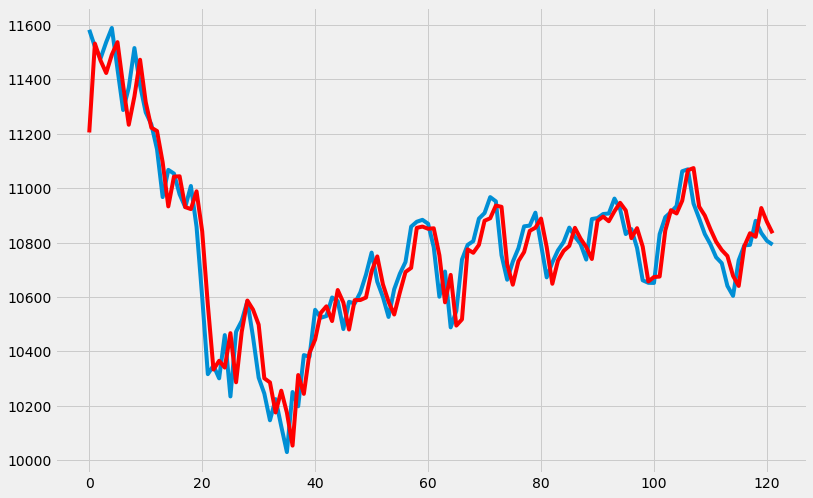

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(train_data["yt_obs"])
plt.plot(est_yt_train, color = "red")
plt.show()

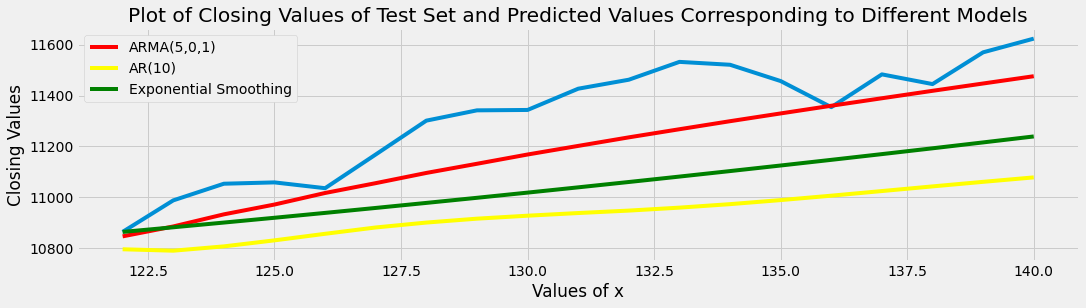

447615.2791734218
3192318.3113796217
1717212.9935687468


In [41]:
plt.figure(figsize=(16, 4))
plt.xlabel("Values of x")
plt.ylabel("Closing Values")
plt.title("Plot of Closing Values of Test Set and Predicted Values Corresponding to Different Models")


plt.plot(test_data["yt_obs"])

plt.plot(est_yt_test, color = "red", label = "ARMA(5,0,1)")
plt.plot(est_yt_test_ar, color = "yellow", label = "AR(10)")
plt.plot(est_yt_test_simexp, color = "green", label = "Exponential Smoothing")

plt.legend(framealpha=1, frameon=True)
plt.show()

test_error_arma = sum(np.square(test_data["yt_obs"] - est_yt_test))
print(test_error_arma)

test_error_ar = sum(np.square(test_data["yt_obs"] - est_yt_test_ar))
print(test_error_ar)

test_error_simexp = sum(np.square(test_data["yt_obs"] - est_yt_test_simexp))
print(test_error_simexp)
